# Study of Optimal City

In [46]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pylab as plt
import seaborn
%matplotlib inline

## Data Colection

In [47]:
county = pd.read_excel('data/CountiesBySector_perCap.xls', header = 16)

In [48]:
MSA_codes = pd.read_csv('data/MSA_codes.csv')

In [49]:
SMA_Name = pd.read_csv('data/SMA_codes_Names.csv').iloc[:,1:]

## Joining Tables

In [53]:
## first step is join the county table which contains Pop and Total GHG with the code for the MSA.

In [54]:
county = county.iloc[:,:4]

In [55]:
county.head()

,State,County,Pop 2000,Total
0,AL,Autauga County,43671,5.865829
1,AL,Baldwin County,140415,3.205008
2,AL,Barbour County,29038,3.422079
3,AL,Bibb County,20826,2.206140
4,AL,Blount County,51024,2.249456


In [56]:
county['County_State'] = county.County + ', ' + county.State

In [57]:
county = county.iloc[:,2:]

In [58]:
MSA_codes = MSA_codes.drop('Unnamed: 0', axis = 1)

In [59]:
MSA_codes[MSA_codes.County_State=='Autauga County, AL']

,MSA,Code,County_State
588,33860,1001,"Autauga County, AL"


In [60]:
county_codes = pd.merge(MSA_codes,county, on = 'County_State', how = 'outer')

In [61]:
county_codes.dropna(inplace=True)

In [63]:
county_codes.head()

,MSA,Code,County_State,Pop 2000,Total
0,10180.0,48059.0,"Callahan County, TX",12905.0,5.900241
1,10180.0,48253.0,"Jones County, TX",20785.0,9.200476
2,10180.0,48441.0,"Taylor County, TX",126555.0,3.022838
10,10420.0,39133.0,"Portage County, OH",152061.0,3.169437
11,10420.0,39153.0,"Summit County, OH",542899.0,2.885084


In [64]:
MSAs = county_codes.groupby(by = 'MSA').sum()

In [65]:
MSAs = MSAs.reset_index()

In [66]:
MSAs.columns = ['MSA', 'Code' ,'Total Carbon Emissions' ,'Total']

In [67]:
SMA_Name.MSA = SMA_Name.MSA*10.0

In [72]:
MSA_total = pd.merge(MSAs,SMA_Name, on= 'MSA')

In [74]:
MSA_sort = MSA_total.sort_values('Total', ascending =False)

In [79]:
MSA_sort.sort

,MSA,Code,Total Carbon Emissions,Total,MSA_Name
18,12060.0,367798.0,4247981.0,464.298144,Atlanta-Sandy Springs-Mariet...
100,21780.0,114850.0,342815.0,398.928053,"Evansville, IN-KY Metropolit..."
64,17300.0,136554.0,232000.0,394.609719,"Clarksville, TN-KY Metropoli..."
160,28140.0,382405.0,1836038.0,371.317709,"Kansas City, MO-KS Metropoli..."
233,37620.0,201452.0,164624.0,364.717317,"Parkersburg-Marietta, WV-OH ..."
191,31420.0,65765.0,222368.0,272.144091,"Macon, GA Metropolitan Stati..."
299,45460.0,72506.0,170943.0,208.504369,"Terre Haute, IN Metropolitan..."
311,47020.0,144701.0,111663.0,196.977799,"Victoria, TX Metropolitan St..."
188,31140.0,262717.0,1161975.0,185.140560,"Louisville, KY-IN Metropolit..."
92,20500.0,148380.0,426493.0,160.481762,"Durham, NC Metropolitan Stat..."


In [ ]:
# the 

## Scatter plots

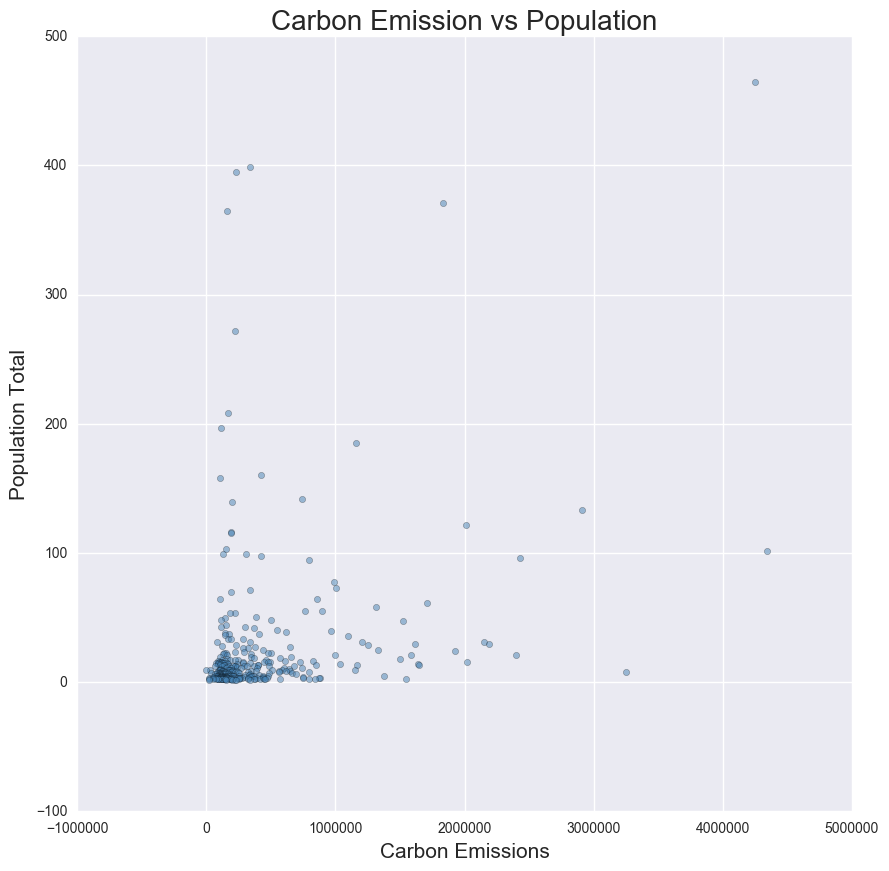

In [85]:
plt.figure(figsize= (10,10))
plt.scatter(MSA_sort['Total Carbon Emissions'], MSA_sort.Total,c = 'SteelBlue', alpha=0.5)
plt.title('Carbon Emission vs Population', size = 20)
plt.xlabel('Carbon Emissions', size = 15)
plt.ylabel('Population Total', size = 15)
plt.show()

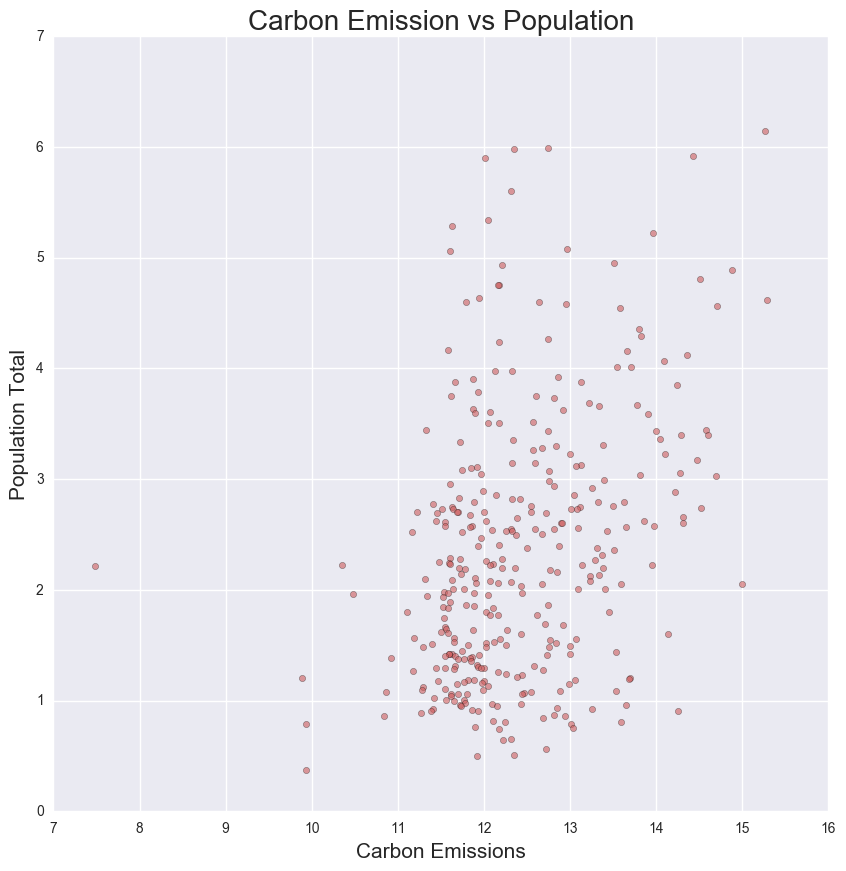

In [83]:
plt.figure(figsize= (10,10))
plt.scatter(np.log(MSA_sort['Total Carbon Emissions']), np.log(MSA_sort.Total), c = 'IndianRed', alpha=0.6)
plt.title('Carbon Emission vs Population', size = 20)
plt.xlabel('Carbon Emissions', size = 15)
plt.ylabel('Population Total', size = 15)
plt.show()